## BACKGROUND

Amazon Web Services - SaaS Sales List

Perusahaan X ingin melakukan analisa terhadap sebuah dataset penjualan SaaS Amazon Web Services untuk mendalami dan bisa meluncurkan strategi yang tepat untuk mengembangi penjualan dan memaksimalkan profit di region-region tertentu.   

Untuk bisa memahami semua opsi yang ada, kita harus merancang pertanyaan riset yang mampu menjawab semua yang dibutuhkan untuk mencapai solusi.

Pertanyaan Riset yang ingin ditanyakan adalah:
"Apakah ada pattern tertentu yang mampu mempengaruhi penjualan dan profit?"

## DATA SOURCES

In [19]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

In [21]:
# Get Data Source
df = pd.read_csv('SaaS-Sales.csv')
display(df.head(10))

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
5,6,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.8600,7,0.00,14.1694
6,7,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ChatBot Plugin,4SYTVM0746,7.2800,4,0.00,1.9656
7,8,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
8,9,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,XPBOBXWXA3,18.5040,3,0.20,5.7825
9,10,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,OneView,71J8P9Z1P0,114.9000,5,0.00,34.4700


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 


1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Sales: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction.






In [23]:
df.shape

(9994, 19)

# Data Cleansing

## Check for Missing Values

Setelah data sudah didapatkan, hal pertama yang harus dilakukan adalah untuk melakukan pembersihan data (data cleansing). Step pertamanya adalah untuk cek adanya data yang tidak terisi (data null).
Ini dikarenakan adanya variabel null bisa mempengaruhi tingkat akurasi analisa kedepannya.

In [24]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Setelah di-run, bisa dilihat bahwa tidak ada kolom yang tidak terisi dalam data set ini.

<Axes: >

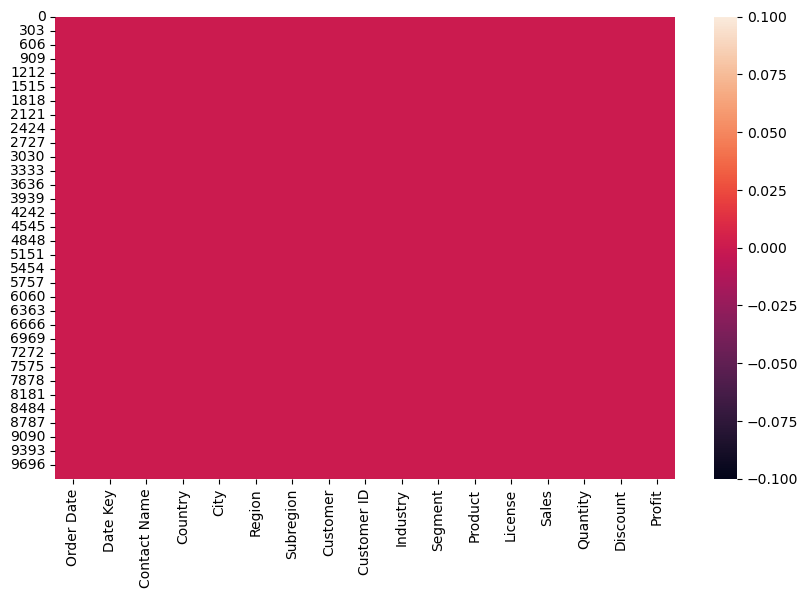

In [71]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Order Date','Date Key','Contact Name','Country','City','Region','Subregion','Customer','Customer ID','Industry','Segment','Product','License','Sales','Quantity','Discount','Profit']].isna())

## Check for Duplicates

Setelah dataset di cek untuk adanya kolom yang tidak berisi (null), kita bisa lanjut untuk cek adanya data yang terduplikat di dalam dataset tersebut.

Dari dalam dataset, bisa dilihat bahwa perusahaan bisa beli beberapa jenis SaaS software dalam 1 Order, maka dari situ jelas bahwa akan adanya duplikat di dalam kolom ['Order ID'].
Dari sini kita bisa menyimpulkan bahwa untuk mencari data yang duplikat, harus dari 1 kolom yang isi datanya harusnya unik.

Dari situ kita pilih untuk cek adanya duplikat lewat kolom ['License']

In [26]:
df.duplicated(subset=['License'])

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [27]:
empty_itemlist = []
for col in df.columns :
    empty_itemlist.append([col, df[col].nunique()])

desc_table = pd.DataFrame(data=empty_itemlist)
desc_table

,0,1
0,Row ID,9994
1,Order ID,5009
2,Order Date,1237
3,Date Key,1237
4,Contact Name,793
5,Country,48
6,City,262
7,Region,3
8,Subregion,12
9,Customer,99


## Duplicates - Country and City

Selanjutnya, kita cek untuk beberapa data set yang ada kemungkinan untuk adanya typo atau adanya duplikat lewat alias-alias berbeda seperti di dalam ['Country'] dan ['City'] (contoh: United States of America & United States (USA, US of A, etc.)

In [28]:
df['Country'].unique()

array(['Ireland', 'United States', 'Germany', 'Sweden', 'Canada', 'Japan',
       'Italy', 'Turkey', 'Costa Rica', 'France', 'Australia',
       'Luxembourg', 'Brazil', 'Philippines', 'India', 'United Kingdom',
       'Chile', 'Spain', 'South Africa', 'Portugal', 'Colombia',
       'Belgium', 'Russia', 'Netherlands', 'Mexico', 'Poland',
       'Singapore', 'New Zealand', 'Czech Republic', 'Saudi Arabia',
       'Argentina', 'South Korea', 'Finland', 'Israel', 'Norway',
       'Ukraine', 'United Arab Emirates', 'Greece', 'China', 'Austria',
       'Indonesia', 'Egypt', 'Denmark', 'Croatia', 'Taiwan', 'Qatar',
       'Slovenia', 'Iceland'], dtype=object)

In [29]:
df['City'].unique()

array(['Dublin', 'New York City', 'Stuttgart', 'Stockholm', 'Toronto',
       'Saitama', 'Naples', 'Ankara', 'Los Angeles', 'San José', 'Paris',
       'Istanbul', 'Tokyo', 'Aichi', 'Wollongong', 'Hanover',
       'Luxembourg', 'Salvador', 'Davao City', 'Kolkata', 'London',
       'Brighton', 'Sydney', 'Puente Alto', 'Madrid', 'Rio de Janeiro',
       'Cape Town', 'Lisboa', 'Uppsala', 'Bogotá', 'Brussels', 'Moscow',
       'Canberra', 'The Hague', 'Mexico City', 'Manila', 'Geelong',
       'Santiago', 'Aurora', 'Warsaw', 'Newark', 'Monterrey', 'Rome',
       'Chicago', 'Singapore', 'Wellington', 'Osaka', 'Melbourne',
       'Prague', 'Riyadh', 'Raleigh', 'Providence', 'Córdoba',
       'Guadalajara', 'Oklahoma City', 'Puerto Vallarta', 'São Paulo',
       'Johannesburg', 'Cologne', 'Rochester', 'Seattle', 'Detroit',
       'Lafayette', 'Munich', 'St Petersburg', 'Buenos Aires', 'Mendoza',
       'Leipzig', 'Jacksonville', 'Long Beach', 'Chiba', 'Incheon',
       'Helsinki', 'Dhahran', 

Dari observasi value-value yang unique dalam kolom tersebut, kita bisa melihat bahwa data-data ini tidak ada typo atau adanya duplikat dalam nama nama berbeda. Dari sini kita bisa menyimpulkan bahwa tidak ada data yang butuh dimanipulasi dari 2 kolom Country dan City

## Deleting Unneeded Columns in Analysis

Setelah data dilihat, kita ada lihat beberapa kolom yang *redundant* (atau value yang bisa direpresentasikan oleh value di kolom lain), maka dari itu kita akan drop beberapa kolom yang tidak akan dipakai dalam analisa kita.

In [30]:
# delete row ID, delete Order Date/Date Key
df_copy = df.copy()
df_copy

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [31]:
df_copy = df_copy.drop(columns=['Row ID','Date Key','Customer ID','License'])
df_copy

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,AMER-2022-138688,6/13/2022,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,1/22/2020,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,Healthcare,SMB,SaaS Connector Pack,25.2480,3,0.20,4.1028
9990,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,SaaS Connector Pack,91.9600,2,0.00,15.6332
9991,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Site Analytics,258.5760,2,0.20,19.3932
9992,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Support,29.6000,4,0.00,13.3200


Setelah melakukan data cleansing, bisa dibilang bahwa dataset ini adalah dataset yang sangat bersih, maka karena itu tidak banyak data manipulation yang dibutuhkan untuk dataset ini.

# Data Analysis

Setelah kita sudah membersihkan data dan memiliki data terakhir yang akan dipakai untuk analisa data, kita harus balik lagi untuk bisa menjawab pertanyaan riset yang telah ditulis di awal, yaitu  "Apakah ada pattern tertentu yang mampu memepengaruhi penjualan dan profit?"

Untuk bisa menjawab pertanyaan ini kita bisa membagi analisa menjadi beberapa jenis analisa seperti:
*   Sales Analysis
*   Time Series Analysis
*   Industrial Analysis
*   Geographic Analysis
*   Regional Trends

Karena kita ingin melihat faktor-faktor yang mempengaruhi jualan, kita akan menetapkan ['Sales'] , atau disini bisa didefinisikan sebagai jumlah yang didapatkan setelah penjualan produk, sebagai variabel dependen (dependent variable) kita.



## Establish the type of Statistical Test to use

Pertama-tama, kita harus mengamati data-data numerical yang ada di data kita.

Berdasarkan informasi dari df.info(), kita bisa menyimpulkan bahwa mayoritas variabel yang akan di uji dengan data Sales ini adalah categorical variable, dimana variabel ini adalah dibagi berdasarkan kategori (contoh: "Country", "City").

Untuk Dataset satu ini, pentingnya kita melakukan Exploratory Data Analysis (EDA) untuk bisa memastikan jenis tes statistik yang tepat untuk melakukan analisa.

In [32]:
df_copy.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


Karena besarnya jumlah variabel yang kita memiliki, salah satu cara terbaik untuk cek adanya anomali adalah lewat summary statistics.

Berdasarkan dari summary statistics yang dilakukan untuk data-data numerical yang di dalam dataset kita, kita bisa melihat bahwa setiap kolom ada value tertentu dari count number.

Dari sini kita juga bisa melihat dari summary statistic ini bahwa value untuk kolom-kolom ini logis, seperti jumlah Sales yang paling minimal bukan angka negatif, dan seperti minimum quantity adalah 1, bukan 0, karena tidak ada penjualan dengan quantity 0.

Dari summary statistics ini kita juga bisa lihat bahwa rata-rata discount yang dikasih untuk penjualan produk adalah 0.16, yaitu 16% dari harga original produk, dan diskon tertinggi adalah 0.8, yaitu 80% discount.


In [33]:
df_corre = df_copy[['Sales','Profit']].corr()
df_corre

,Sales,Profit
Sales,1.000000,0.479064
Profit,0.479064,1.000000


In [34]:
df_corre_discount = df_copy[['Quantity','Discount']].corr()
df_corre_discount

,Quantity,Discount
Quantity,1.000000,0.008623
Discount,0.008623,1.000000


In [35]:
df_corre_numeric = df_copy[['Quantity','Discount','Sales','Profit']].corr()
df_corre_numeric 

,Quantity,Discount,Sales,Profit
Quantity,1.000000,0.008623,0.200795,0.066253
Discount,0.008623,1.000000,-0.028190,-0.219487
Sales,0.200795,-0.028190,1.000000,0.479064
Profit,0.066253,-0.219487,0.479064,1.000000


Untuk bisa memilih tes statistik yang tepat untuk dataset ini, pertama-tama, kita harus memastikan jenis distribusi dataset ini.
Untuk distribusi value dataset bisa dikategorisasikan menjadi dataset berdistribusi normal (atau disebut parametrik) atau berdistribusi non-normal (atau non-parametrik).

Untuk melihat distribusi sebuah dataset, ada 2 cara yang bisa dilakukan untuk dataset ini, karena besarnya value count yang ada di dataset ini (count = 9994):
1. Cara pertama adalah untuk plot histogram
2. Cara kedua adalah untuk melakukan z-test



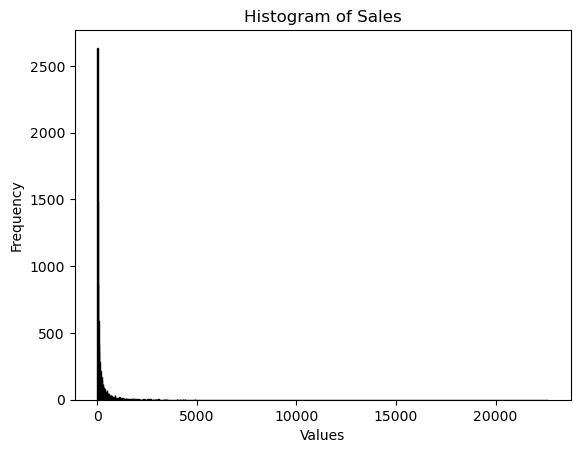

In [36]:
plt.hist(df_copy['Sales'], bins='auto', edgecolor='black')
plt.title('Histogram of Sales')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


In [37]:
# null hypothesis of normal test: the data is normally distributed
# alternative hypothesis of normal test: the data is not normally distributed

stats, p_val=normaltest(df['Sales'])
if p_val < 0.05:
    print("Reject the null hypothesis. The data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis. The data may be normally distributed.")

Reject the null hypothesis. The data is not normally distributed.


Dari hasil Histogram untuk ['Sales'], kita bisa melihat bahwa data ['Sales'] ini tidak didistribusi secara normal.
Dari test normal test pun juga menunjukan bahwa data ['Sales'] ini tidak di-distribusi secara normal. Maka dari sini kita bisa menyimpulkan bahwa tes statistik yang dibutuhkan untuk melakukan tes statistik inferensial untuk ['Sales'] adalah tes statistik non-parametrik.

Selanjutnya kita melakukan pengecekan untuk distribusi variabel ['Profit']

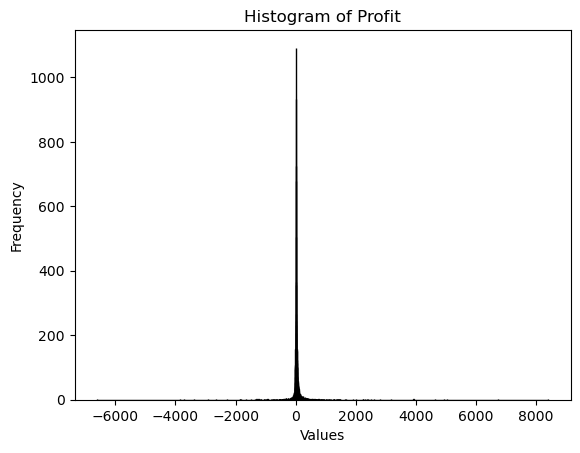

In [38]:
plt.hist(df_copy['Profit'], bins='auto', edgecolor='black')
plt.title('Histogram of Profit')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [39]:
# null hypothesis of normal test: the data is normally distributed
# alternative hypothesis of normal test: the data is not normally distributed
_, p_val=normaltest(df['Profit'])
print(p_val)
if p_val < 0.05:
    print("Reject the null hypothesis. The data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis. The data may be normally distributed.")

0.0
Reject the null hypothesis. The data is not normally distributed.


Dari hasil Histogram untuk ['Profit'], kita bisa melihat bahwa data ['Profit'] ini terlihat seakan-akan terdistribusi normal, dari segi bentuk (bentuk bell yang agak lancip). Tetapi dari hasil test normal test menunjukan bahwa data ['Profit'] ini tidak di-distribusi secara normal.
Maka dari sini kita bisa menyimpulkan bahwa tes statistik yang dibutuhkan untuk melakukan tes statistik inferensial untuk ['Profit'] adalah tes statistik non-parametrik.

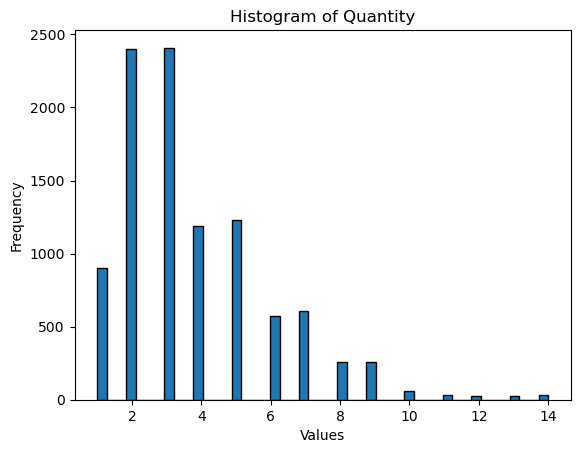

In [40]:
plt.hist(df_copy['Quantity'], bins='auto', edgecolor='black')
plt.title('Histogram of Quantity')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

Dari hasil Histogram untuk ['Quantity'], kita bisa melihat bahwa data ['Quantity'] adalah variabel discrete (tidak continuous). Maka dari sini kita bisa menyimpulkan bahwa tes statistik yang cocok untuk ['Quantity'] adalah tes seperti Chi-Squared atau Fisher.

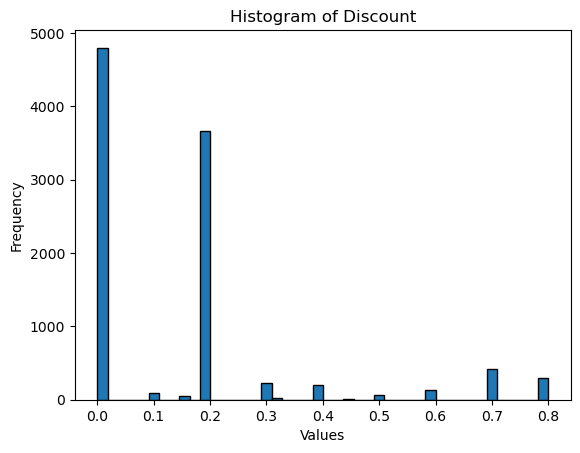

In [41]:
plt.hist(df_copy['Discount'], bins='auto', edgecolor='black')
plt.title('Histogram of Discount')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

## Descriptive Analysis

In [42]:
sales_by_company = df_copy.groupby('Customer')['Sales'].sum().reset_index()
sales_by_company = sales_by_company.sort_values('Sales', ascending=False)
sales_by_company.head(10)

,Customer,Sales
10,Anthem,55719.2100
38,Ford Motor,43893.0424
4,Allianz,42904.1670
16,Bank of America Corp.,41255.9471
92,Valero Energy,41220.4188
55,Lowes,40360.1630
89,Tyson Foods,40326.3440
5,Allstate,39941.6400
9,AmerisourceBergen,39234.7610
13,BMW,39083.7900


# Statistical Analysis

## Segment and Industrial Analysis

In [43]:
fig = px.sunburst(df_copy, path=['Region','Segment', 'Industry'], values='Sales')
fig.update_layout(title_text="Sales as a proportion of Segment and Industry", title_x=0.5)
fig.show()

In [44]:
fig = px.sunburst(df_copy, path=['Segment', 'Industry'], values='Sales')
fig.update_layout(title_text="Sales as a proportion of Segment and Industry", title_x=0.5)
fig.show()

Disini telah dibuat Sunburst Chart yang merepresentasikan sales sebagai proporsi dari region, segment, dan industry.
Di sini kita bisa lihat bahwa SMB merupakan proporsi paling besar untuk setiap region, dan juga merangkup sekitar 50% dari seluruh sales. Tidak kaget, karena SMB merupakan salah satu 'jantung' dari GDP setiap negara

Kita juga bisa melihat bahwa segment yang paling besar adalah segment Finance di setiap industry dan region.
Meskipun Finance adalah proporsi paling besar di setiap segment, jenis kebutuhan software berbeda untuk tiap segment. Contoh, proporsi kedua paling besar di Sales Strategic Software adalah Energy, kemudian Tech. Sedangkan untuk Enterprise Software, kedua paling besar adalah Manufacturing, dan Healthcare ketiga paling besar. Untuk SMB, yang kedua paling besar adalah Healthcare, dan ketiga adalah Manufacturing.

Untuk analisa lebih akurat, kita bisa memakai bar chart untuk melakukan perbandingan antar industry dan segment.



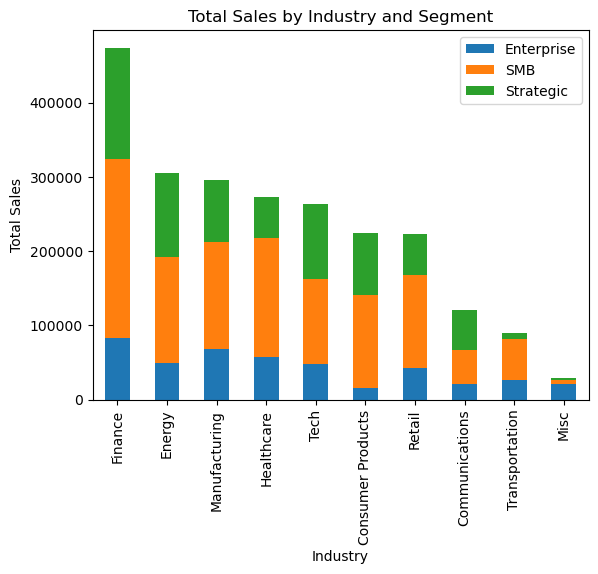

In [45]:
# Assuming 'Industry' is the categorical variable, 'Segment' is the subcategory variable, and 'Sales' is the sales column
categories = df_copy['Industry'].unique()
subcategories = df_copy['Segment'].unique()

# Create a DataFrame with the total sales for each subcategory within each category
total_sales_by_segment = df_copy.groupby(['Industry', 'Segment'])['Sales'].sum().reset_index()

# Pivot the DataFrame to have 'Industry' as the index and 'Segment' as the columns
pivot_df = pd.pivot_table(total_sales_by_segment, values='Sales', index='Industry', columns='Segment', fill_value=0)
pivot_df = pivot_df.sum(axis=1).sort_values(ascending=False).to_frame().merge(pivot_df, left_index=True, right_index=True)


# Plot the stacked bar chart
pivot_df.drop(columns=0).plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Industry')
plt.ylabel('Total Sales')
plt.title('Total Sales by Industry and Segment')

# Show the plot
plt.show()

Dari sini kita bisa menyimpulkan bahwa beberapa industry yang paling berkontribusi ke penjualan software adalah industry Finance, Energy, Healthcare, Manufacturing, dan Tech, dan yang paling tinggi di semua sektor adalah industry Finance.

Karena semua data seperti sales, profit, quantity dan discount dikelompokkan berdasarkan kategori-kategori seperti region, segment, industry, dll., untuk menyesuaikan untuk data non-parametrik, jenis tes statistik yang kita akan pakai adalah non-parametrik ANOVA, yang juga disebut sebagai Kruskal-Wallis, karena banyaknya jenis kategori.

In [46]:
import pandas as pd
from scipy.stats import kruskal

categories = df_copy['Industry'].unique()

# Create a list to store the sales data for each category
sales_by_category = [df_copy[df_copy['Industry'] == category]['Sales'] for category in categories]

# Perform ANOVA
f_statistic, p_value = kruskal(*sales_by_category)

# Display results
print(f"Kruskal-Wallis: {f_statistic}")
print(f"P-value: {p_value}")

# Check significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between group means.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between group means.")

Kruskal-Wallis: 9.338006517700114
P-value: 0.4066762368111694
Fail to reject the null hypothesis. There are no significant differences between group means.


In [47]:
categories = df_copy['Industry'].unique()

# Create a list to store the sales data for each category
profit_by_category = [df_copy[df_copy['Industry'] == category]['Profit'] for category in categories]

# Perform ANOVA
f_statistic, p_value = kruskal(*profit_by_category)

# Display results
print(f"Kruskal-Wallis: {f_statistic}")
print(f"P-value: {p_value}")

# Check significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between group means.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between group means.")

Kruskal-Wallis: 23.953374489860753
P-value: 0.004375636661226059
Reject the null hypothesis. There are significant differences between group means.


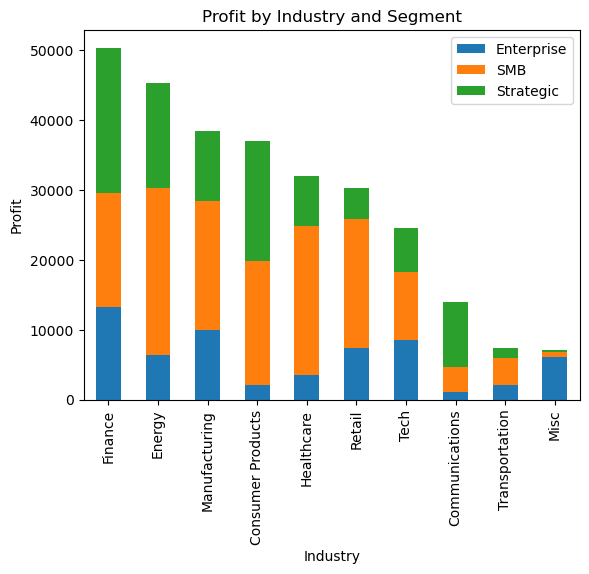

In [48]:
# Assuming 'Industry' is the categorical variable, 'Segment' is the subcategory variable, and 'Sales' is the sales column
categories = df_copy['Industry'].unique()
subcategories = df_copy['Segment'].unique()

# Create a DataFrame with the total sales for each subcategory within each category
total_profit_by_segment = df_copy.groupby(['Industry', 'Segment'])['Profit'].sum().reset_index()

# Pivot the DataFrame to have 'Industry' as the index and 'Segment' as the columns
pivot_df = pd.pivot_table(total_profit_by_segment, values='Profit', index='Industry', columns='Segment', fill_value=0)
pivot_df = pivot_df.sum(axis=1).sort_values(ascending=False).to_frame().merge(pivot_df, left_index=True, right_index=True)


# Plot the stacked bar chart
pivot_df.drop(columns=0).plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Industry')
plt.ylabel('Profit')
plt.title('Profit by Industry and Segment')

# Show the plot
plt.show()

In [49]:
# Perform a two-way Kruskal-Wallis test
result = kruskal(*[group['Profit'] for name, group in df_copy.groupby(['Segment', 'Industry'])])

# Output the result
print("Kruskal-Wallis Statistic:", result.statistic)
print("P-Value:", result.pvalue)

# Interpret the result
alpha = 0.05  # Set your significance level
if result.pvalue < alpha:
    print("Reject the null hypothesis. There are significant differences.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences.")

Kruskal-Wallis Statistic: 46.96488803718685
P-Value: 0.01877057483740293
Reject the null hypothesis. There are significant differences.


Setelah dilakukannya tes analysis of variance melalui Kruskal-Wallis test, kita bisa melihat bahwa tidak ada efek yang signifikan terhadap penjualan di berbeda industry. Ini dikarenakan distribusi industry di setiap segment kurang lebih rata.

Tetapi analisa lebih lanjut terhadap profit dengan industry menunjukan bukti kuat melawan null hypothesis (p=0.004), dan mengkorporasikan segment dan industry berbarengan (p=0.018). Ini menunjukan bahwa industry sangat berpengaruh dalam menghasilkan profit dalam penjualan.

Dari sini kita juga bisa menyimpulkan bahwa industry yang membawa profit paling banyak adalah industry Finance, Energy dan Manufacturing. Ini kemungkinan besar dikarenakan pentingnya software dalam industry-industry tersebut untuk bisa menjalankan bisnis dan melakukan perhitungan, marketing reach, dll.

## Regional Analysis

Text(0.5, 1.0, 'Sales by Region')

<Figure size 1500x600 with 0 Axes>

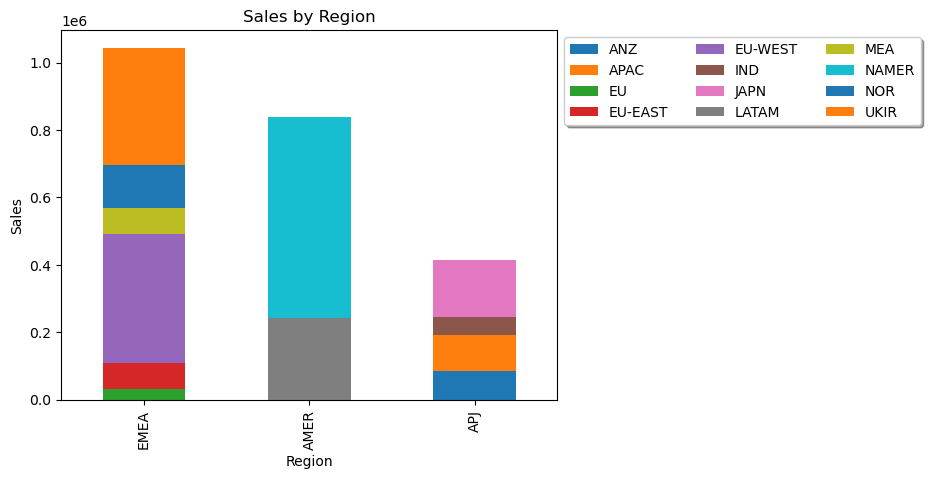

In [50]:
# Assuming 'Industry' is the categorical variable, 'Segment' is the subcategory variable, and 'Sales' is the sales column
categories = df_copy['Region'].unique()
subcategories = df_copy['Subregion'].unique()

# Create a DataFrame with the total sales for each subcategory within each category
total_sales_by_region = df_copy.groupby(['Region','Subregion'])['Sales'].sum().reset_index()

# Pivot the DataFrame to have 'Industry' as the index and 'Segment' as the columns
pivot_df = pd.pivot_table(total_sales_by_region, values='Sales', index='Region', columns='Subregion', fill_value=0)
pivot_df = pivot_df.sum(axis=1).sort_values(ascending=False).to_frame().merge(pivot_df, left_index=True, right_index=True)

plt.figure(figsize=(10, 6)).set_figwidth(15)
# Plot the stacked bar chart
ax = pivot_df.drop(columns=0).plot(kind='bar', stacked=True)

# Add labels and title
ax.legend(loc='upper left', bbox_to_anchor=(1, 1),
          ncol=3, fancybox=True, shadow=True)
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Sales by Region')

# Show the plot


In [51]:
categories = df_copy['Region'].unique()

# Create a list to store the sales data for each category
sales_by_region = [df[df['Region'] == category]['Sales'] for category in categories]

# Perform ANOVA
f_statistic, p_value = kruskal(*sales_by_region)

# Display results
print(f"Kruskal-Wallis: {f_statistic}")
print(f"P-value: {p_value}")

# Check significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between group means.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between group means.")

Kruskal-Wallis: 36.24956654114446
P-value: 1.3443323199174605e-08
Reject the null hypothesis. There are significant differences between group means.


In [52]:
sales_by_country = df_copy.groupby('Country')['Sales'].sum().reset_index()
sales_by_country = sales_by_country.sort_values('Sales', ascending=False)
sales_by_country.head(10)

,Country,Sales
47,United States,457687.6315
46,United Kingdom,313169.8810
24,Japan,170188.0458
5,Canada,138641.2700
15,France,116511.9140
16,Germany,89473.7080
1,Australia,80166.1010
26,Mexico,78258.1360
4,Brazil,76269.6140
40,Spain,70636.7200


Dari bar graph bisa dilihat bahwa region dengan penjualan paling tinggi adalah Europe, Middle East & Africa (EMEA), diikuti oleh AMERICAS dan terakhir Asia-Pacific & Japan.

Setelah dilakukannya tes analysis of variance melalui Kruskal-Wallis test, kita bisa melihat bahwa ada efek yang signifikan terhadap penjualan di berbeda region.

Dari sini kita juga bisa menyimpulkan bahwa region dengan revenue paling besar paling banyak adalah EMEA, yang kemungkinan besar dikarenakan oleh banyaknya negara yang mencakup EMEA. Untuk besarnya penjualan negara, bisa dilihat di visualisasi Tableau, yaitu United States, United Kingdom, dan Jepang.

Bisa dilihat bahwa ini adalah negara-negara yang sudah maju. Karena negara maju juga maju dalam penerapan teknologi di bisnis dan ke-sehari-hariannya, maka mereka membutuhkan banyak software.

Text(0.5, 1.0, 'Profit by Region')

<Figure size 1500x600 with 0 Axes>

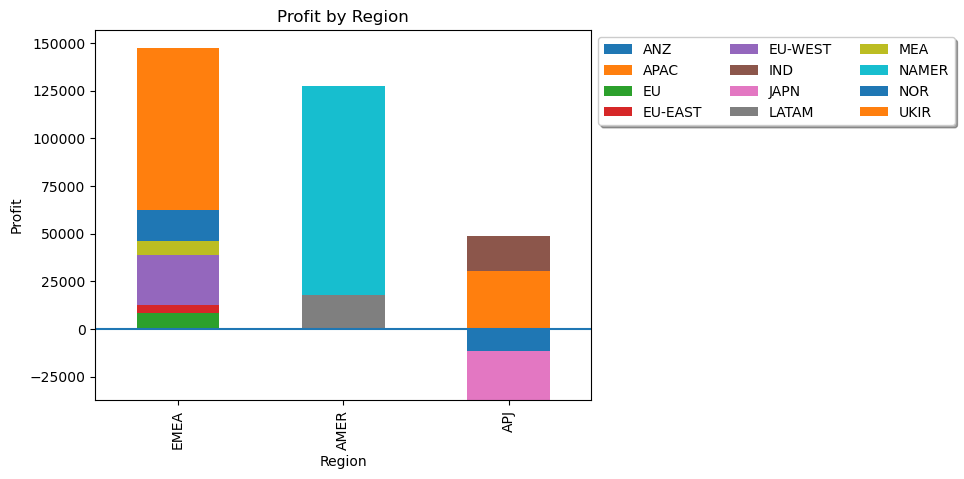

In [53]:
subcategories_region = df_copy['Subregion'].unique()

total_profit_by_region = df_copy.groupby(['Region','Subregion'])['Profit'].sum().reset_index()

pivot_df = pd.pivot_table(total_profit_by_region, values='Profit', index='Region', columns='Subregion', fill_value=0)
pivot_df = pivot_df.sum(axis=1).sort_values(ascending=False).to_frame().merge(pivot_df, left_index=True, right_index=True)

plt.figure(figsize=(10, 6)).set_figwidth(15)
ax = pivot_df.drop(columns=0).plot(kind='bar', stacked=True)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1),
          ncol=3, fancybox=True, shadow=True)
plt.axhline(0)
plt.xlabel('Region')
plt.ylabel('Profit')
plt.title('Profit by Region')


Text(0.5, 1.0, 'Profit by Subregion')

<Figure size 1500x600 with 0 Axes>

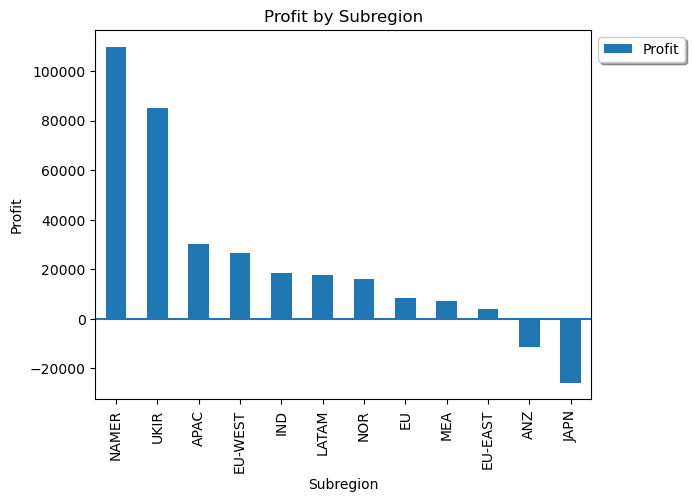

In [54]:
subcategories_region = df_copy['Subregion'].unique()

total_profit_by_subregion = df_copy.groupby('Subregion')['Profit'].sum().reset_index()

pivot_df = pd.pivot_table(total_profit_by_subregion, values='Profit', index='Subregion', fill_value=0)
pivot_df = pivot_df.sum(axis=1).sort_values(ascending=False).to_frame().merge(pivot_df, left_index=True, right_index=True)

plt.figure(figsize=(10, 6)).set_figwidth(15)
colors = sns.color_palette(n_colors=len(subcategories_region))
ax = pivot_df.drop(columns=0).plot(kind='bar', color=colors)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1),
          ncol=3, fancybox=True, shadow=True)
plt.axhline(0)
plt.xlabel('Subregion')
plt.ylabel('Profit')
plt.title('Profit by Subregion')

In [55]:
categories = df_copy['Region'].unique()

profit_by_region = [df[df['Region'] == category]['Profit'] for category in categories]

f_statistic, p_value = kruskal(*profit_by_region)


print(f"Kruskal-Wallis: {f_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between group means.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between group means.")

Kruskal-Wallis: 325.4616440231316
P-value: 2.1227652267825937e-71
Reject the null hypothesis. There are significant differences between group means.


Text(0.5, 1.0, 'Average Discount by Subregion')

<Figure size 1500x600 with 0 Axes>

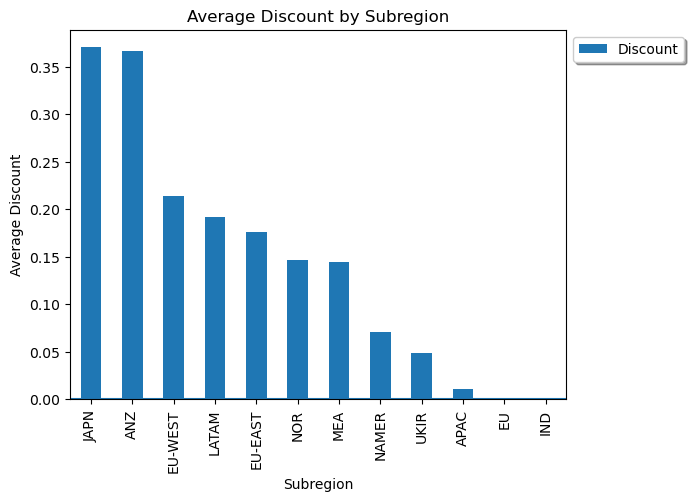

In [56]:
subcategories_region = df_copy['Subregion'].unique()

total_discount_by_region = df_copy.groupby('Subregion')['Discount'].mean().reset_index()

pivot_df = pd.pivot_table(total_discount_by_region, values='Discount', index='Subregion', fill_value=0)
pivot_df = pivot_df.sum(axis=1).sort_values(ascending=False).to_frame().merge(pivot_df, left_index=True, right_index=True)

plt.figure(figsize=(10, 6)).set_figwidth(15)
colors = sns.color_palette(n_colors=len(subcategories_region))
ax = pivot_df.drop(columns=0).plot(kind='bar', color=colors)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1),
          ncol=3, fancybox=True, shadow=True)
plt.axhline(0)
plt.xlabel('Subregion')
plt.ylabel('Average Discount')
plt.title('Average Discount by Subregion')

Untuk bisa membedah profit per-subregion, bar graph yang menunjukan setiap individual subregion pun dibuat.
Dari bar graph ini kita bisa lihat bahwa ternyata APAC mempunyai profit paling rendah, dan yang paling tinggi adalah di EMEA, tetapi untuk Subregion yang paling profitable adalah region North America, diikuti oleh United Kingdom + Ireland. Bahkan, Jepang dan Australia-New Zealand memiliki profit yang negatif.

Setelah dilakukannya tes analysis of variance melalui Kruskal-Wallis test, kita bisa melihat bahwa ada efek yang signifikan terhadap profit di berbeda region.

Dari sini kita juga bisa menyimpulkan bahwa region dengan profit paling besar paling banyak adalah EMEA, yang kemungkinan besar dikarenakan oleh banyaknya negara yang mencakup EMEA.

Untuk faktor yang seharusnya mempengaruhi profit di dataset ini adalah discount, yaitu discount yang dikasih oleh penjualan produk tersebut. Di visualisasi lain, bisa dilihat bahwa banyak discount diterapkan di produk-produk yang di jual di ANZ dan JPN, yaitu rata-rata sekitar diskon 37% untuk harga-harga penjualan di region tersebut. Ini kemungkinan adalah marketing strategy untuk menarik customer kedepannya.

## Product Analysis

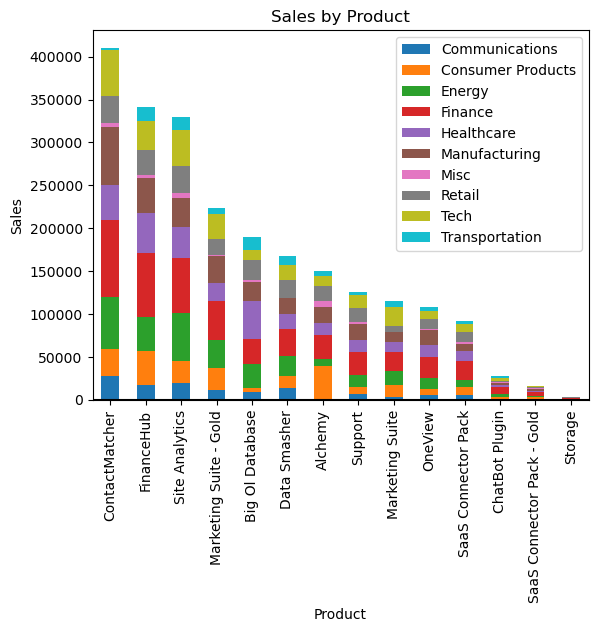

In [57]:
categories = df_copy['Product'].unique()
subcategories = df_copy['Industry'].unique()

total_sales_by_product = df_copy.groupby(['Product','Industry'])['Sales'].sum().reset_index()

pivot_df = pd.pivot_table(total_sales_by_product, values='Sales', index='Product', columns='Industry', fill_value=0)
pivot_df = pivot_df.sum(axis=1).sort_values(ascending=False).to_frame().merge(pivot_df, left_index=True, right_index=True)

pivot_df.drop(columns=0).plot(kind='bar', stacked=True)

# Add labels and title
plt.axhline(0, color="black")
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Sales by Product')

# Show the plot
plt.show()

In [58]:
categories = df_copy['Product'].unique()

# Create a list to store the sales data for each category
profit_by_category = [df[df['Product'] == category]['Sales'] for category in categories]

# Perform ANOVA
f_statistic, p_value = kruskal(*profit_by_category)

# Display results
print(f"Kruskal-Wallis: {f_statistic}")
print(f"P-value: {p_value}")

# Check significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between group means.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between group means.")

Kruskal-Wallis: 2763.0537257623664
P-value: 0.0
Reject the null hypothesis. There are significant differences between group means.


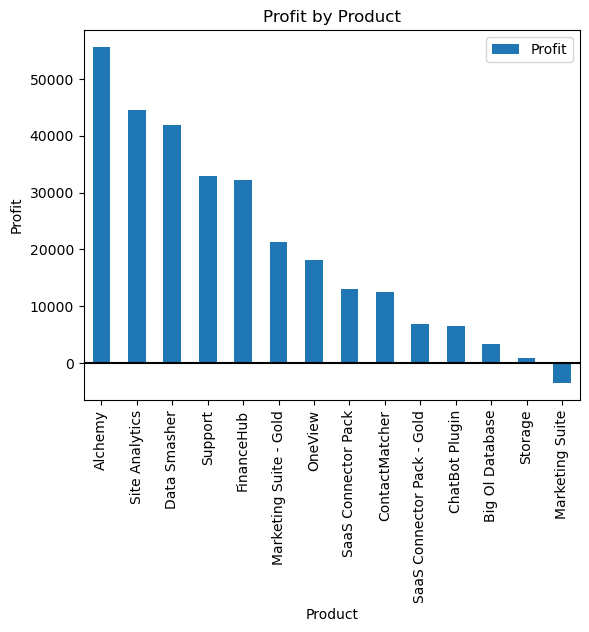

In [59]:
# Assuming 'Industry' is the categorical variable, 'Segment' is the subcategory variable, and 'Sales' is the sales column
categories = df_copy['Product'].unique()
# subcategories = df_copy['Segment'].unique()

# Create a DataFrame with the total sales for each subcategory within each category
total_profit_by_segment = df_copy.groupby(['Product'])['Profit'].sum().reset_index()

# Pivot the DataFrame to have 'Industry' as the index and 'Segment' as the columns
pivot_df = pd.pivot_table(total_profit_by_segment, values='Profit', index='Product', fill_value=0)
pivot_df = pivot_df.sum(axis=1).sort_values(ascending=False).to_frame().merge(pivot_df, left_index=True, right_index=True)

# Plot the stacked bar chart
pivot_df.drop(columns=0).plot(kind='bar', stacked=True)

# Add labels and title
plt.axhline(0, color="black")
plt.xlabel('Product')
plt.ylabel('Profit')
plt.title('Profit by Product')

# Show the plot
plt.show()

In [60]:
categories = df['Product'].unique()

# Create a list to store the sales data for each category
profit_by_category = [df[df['Product'] == category]['Profit'] for category in categories]

# Perform ANOVA
f_statistic, p_value = kruskal(*profit_by_category)

# Display results
print(f"Kruskal-Wallis: {f_statistic}")
print(f"P-value: {p_value}")

# Check significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between group means.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between group means.")

Kruskal-Wallis: 1086.9039328624303
P-value: 3.7186575880021935e-224
Reject the null hypothesis. There are significant differences between group means.


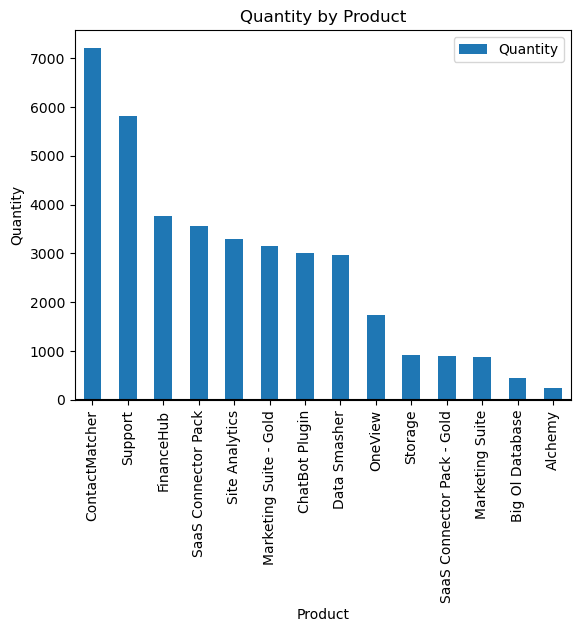

In [61]:
categories = df_copy['Product'].unique()
# subcategories = df_copy['Segment'].unique()

# Create a DataFrame with the total sales for each subcategory within each category
total_profit_by_segment = df_copy.groupby(['Product'])['Quantity'].sum().reset_index()

# Pivot the DataFrame to have 'Industry' as the index and 'Segment' as the columns
pivot_df = pd.pivot_table(total_profit_by_segment, values='Quantity', index='Product', fill_value=0)
pivot_df = pivot_df.sum(axis=1).sort_values(ascending=False).to_frame().merge(pivot_df, left_index=True, right_index=True)

# Plot the stacked bar chart
pivot_df.drop(columns=0).plot(kind='bar')

# Add labels and title
plt.axhline(0, color="black")
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('Quantity by Product')

# Show the plot
plt.show()

In [62]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df_copy is your DataFrame with 'Quantity' and other relevant columns

# Create bins for quantity
bins = [1, 3, 6, 9, 12, 15, float('inf')]  # Adjust the bin edges as needed
labels = ['1-3', '4-6', '7-9', '10-12', '12-14','15']
df_copy['Quantity_Group'] = pd.cut(df_copy['Quantity'], bins=bins, labels=labels, right=False)

# Create a contingency table
contingency_table = pd.crosstab(df_copy['Quantity_Group'], df_copy['Product'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")

# Interpret the results
alpha = 0.05  # Set your significance level
if p < alpha:
    print("Reject the null hypothesis. There is a significant association between Quantity and Product.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Quantity and Product.")


Chi-Square Value: 52.67344506995222
P-Value: 0.4478420582358826
Fail to reject the null hypothesis. There is no significant association between Quantity and Product.


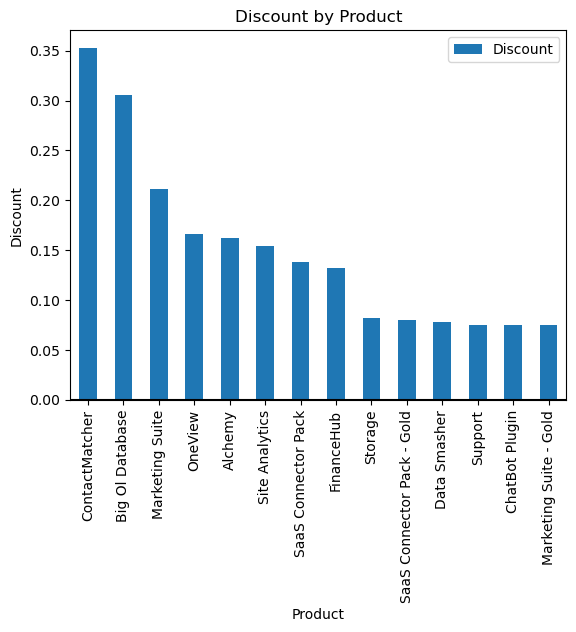

In [63]:
categories = df_copy['Product'].unique()
# subcategories = df_copy['Segment'].unique()

# Create a DataFrame with the total sales for each subcategory within each category
total_profit_by_segment = df_copy.groupby(['Product'])['Discount'].mean().reset_index()

# Pivot the DataFrame to have 'Industry' as the index and 'Segment' as the columns
pivot_df = pd.pivot_table(total_profit_by_segment, values='Discount', index='Product', fill_value=0)
pivot_df = pivot_df.sum(axis=1).sort_values(ascending=False).to_frame().merge(pivot_df, left_index=True, right_index=True)

# Plot the stacked bar chart
pivot_df.drop(columns=0).plot(kind='bar')

# Add labels and title
plt.axhline(0, color="black")
plt.xlabel('Product')
plt.ylabel('Discount')
plt.title('Discount by Product')

# Show the plot
plt.show()

Kita ingin melakukan analisa penjualan dan profit dari tiap produk yang ada. Dari sini kita bisa lihat bahwa software paling popular adalah software-software seperti ContactMatcher, FinanceHub, dan Site Analytics.
Software-software ini kemungkinan besar adalah software yang berkaitan dengan perusahaan-perusahaan yang banyak telah go digital, seperti Fintech, E-commerce, Digital Marketing, dsb.

Untuk profit, software dengan profit paling tinggi adalah Alchemy, diikuti oleh Site Analytics, dan Data Smasher. Ini mungkin karena cost yang dibutuhkan untuk develop software tersebut tidak begitu tinggi, dibandingkan dengan yang development lebih complex seperti Database dan Marketing Suite. Bahkan ada juga yang profit negatif seperti Marketing Suite.

Setelah dilakukannya tes analysis of variance melalui Kruskal-Wallis test, kita bisa melihat bahwa ada efek yang signifikan terhadap profit dan sales untuk setiap produk.

Untuk faktor yang seharusnya mempengaruhi profit di dataset ini adalah discount, yaitu discount yang dikasih oleh penjualan produk tersebut. Ini adalah penjelasan yang menarik, karena korelasi discount dengan variable-variable lainnya sangat-sangat lemah. Artinya ada faktor-faktor lain yang mempengaruhi Sales dan Profit.

## Time Series Analysis

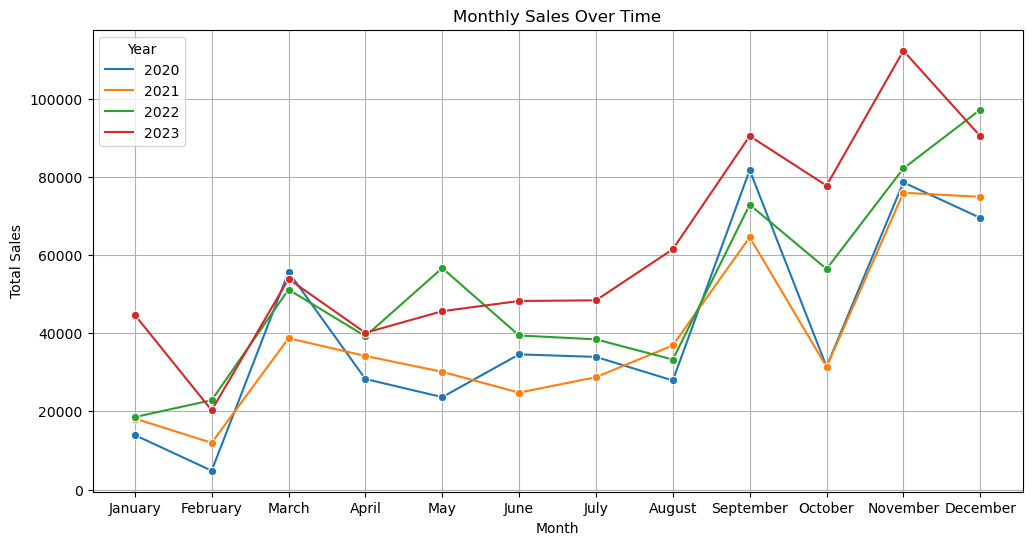

In [64]:
import calendar
df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'])

df_copy['Date'] = df_copy['Order Date'].dt.date
df_copy['Month'] = df_copy['Order Date'].dt.month
df_copy['Year'] = df_copy['Order Date'].dt.year


monthly_sales_over_time = df_copy.groupby(['Month','Year'])['Sales'].sum().reset_index()
monthly_sales_over_time['Month'] = monthly_sales_over_time['Month'].apply(lambda x: calendar.month_name[x])
monthly_sales_over_time.reset_index(drop=True, inplace=True)

# Plot time series for the 'Value' column

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_over_time, x='Month', y='Sales', hue='Year', marker='o', palette='tab10')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


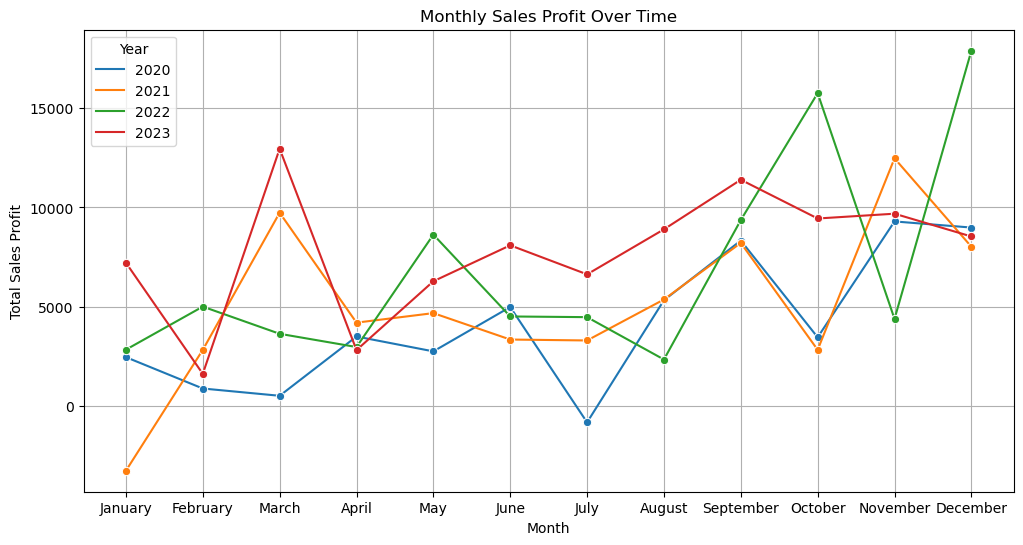

In [65]:
monthly_profit_over_time = df_copy.groupby(['Month','Year'])['Profit'].sum().reset_index()
monthly_profit_over_time['Month'] = monthly_profit_over_time['Month'].apply(lambda x: calendar.month_name[x])
monthly_profit_over_time.reset_index(drop=True, inplace=True)



plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_profit_over_time, x='Month', y='Profit', hue='Year', marker='o', palette='tab10')
plt.title('Monthly Sales Profit Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Profit')
plt.grid(True)
plt.show()

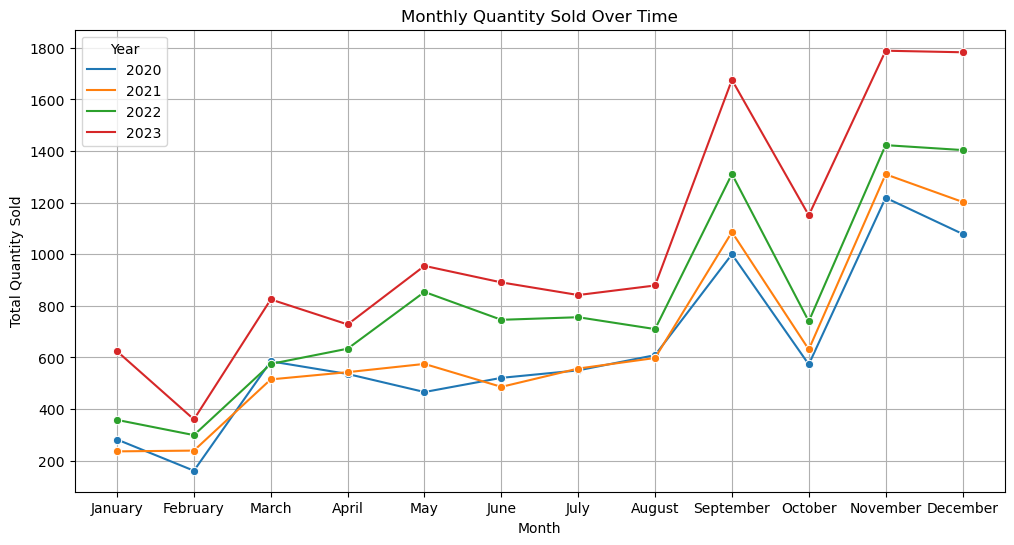

In [66]:
monthly_quantity_over_time = df_copy.groupby(['Month','Year'])['Quantity'].sum().reset_index()
monthly_quantity_over_time['Month'] = monthly_quantity_over_time['Month'].apply(lambda x: calendar.month_name[x])
monthly_quantity_over_time.reset_index(drop=True, inplace=True)


plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_quantity_over_time, x='Month', y='Quantity', hue='Year', marker='o', palette='tab10')
plt.title('Monthly Quantity Sold Over Time')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

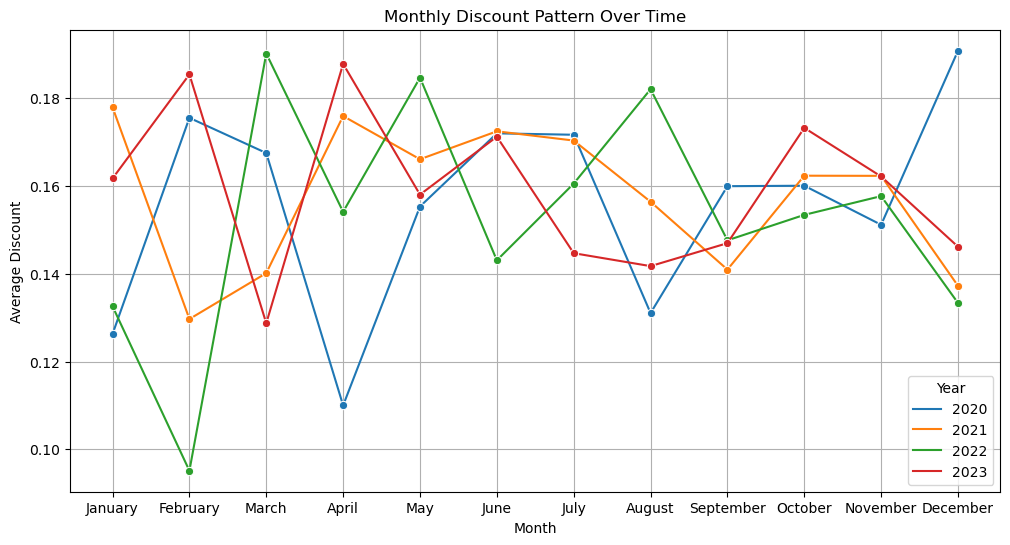

In [67]:
monthly_discount_over_time = df_copy.groupby(['Month','Year'])['Discount'].mean().reset_index()
monthly_discount_over_time['Month'] = monthly_discount_over_time['Month'].apply(lambda x: calendar.month_name[x])
monthly_discount_over_time.reset_index(drop=True, inplace=True)


plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_discount_over_time, x='Month', y='Discount', hue='Year', marker='o', palette='tab10')
plt.title('Monthly Discount Pattern Over Time')
plt.xlabel('Month')
plt.ylabel('Average Discount')
plt.grid(True)
plt.show()

Untuk melakukan analisa untuk mencari adanya pattern di setiap bulannya dalam 1 tahun, kita bisa melakukan seperti time-series analysis, dimana kita menganalisa sales, profit, quantity sold dan discount over time.

Satu hal yang jelas adalah tingginya sales, profit dan quantity sold di setiap akhir tahun (Q4), dan rendahnya angka-angka tersebut di awal tahun tiap tahunnya (Q1). Graph-graph ini juga menunjukkan bahwa jumlah sales, profit dan quantity sold mengalami kenaikan di hampir setiap tahun setelah tahun 2020, dan paling tinggi di 2023.

Angka-angka ini kemungkinan besar paling rendah di tahun 2020-2021 karena adanya pandemi di seluruh dunia, yang membuat keuangan perusahaan menurun, dan begitu pula kebutuhan pembelian produk baru. Tetapi titik terang ini adalah karena banyaknya perusahaan yang go digital karena pandemi COVID-19, di tahun 2022 dan 2023 terjadi ledakan naikan di penjualan, profit dan jumlah produk yang dijual. Karena banyak perusahaan yang go digital, maka kebutuhan software juga semakin naik, dan juga diprediksi untuk akan terus menaik, dengan banyaknya perusahaan konvensional pun yang menerapkan software dan teknologi baru.

## Simple Moving Average

C:\Users\Great\AppData\Local\Temp\ipykernel_59112\2104375962.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Great\AppData\Local\Temp\ipykernel_59112\2104375962.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Great\AppData\Local\Temp\ipykernel_59112\2104375962.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

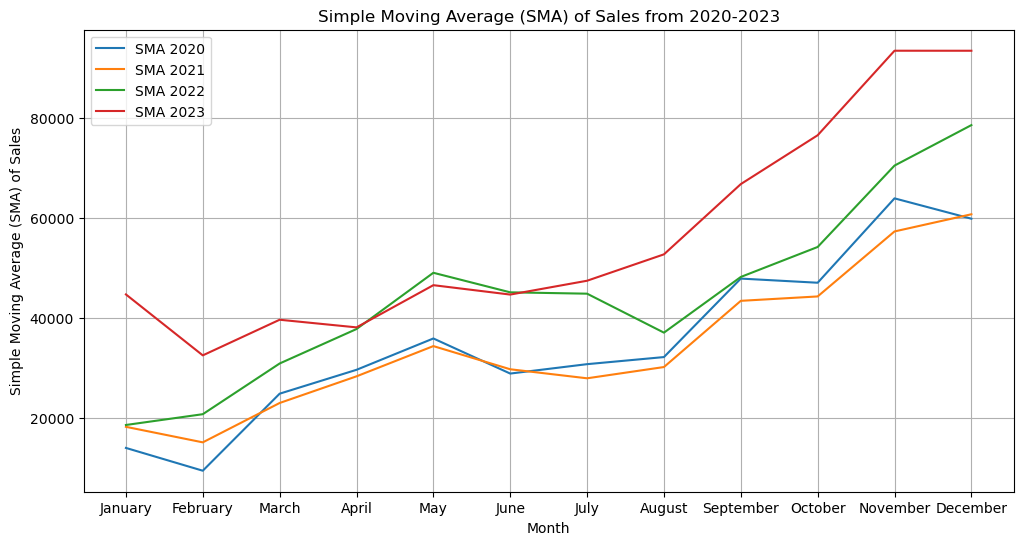

In [69]:
monthly_sales_over_time = df_copy.groupby(['Month','Year'])['Sales'].sum().reset_index()
monthly_sales_over_time['Month'] = monthly_sales_over_time['Month'].apply(lambda x: calendar.month_name[x])
monthly_sales_over_time.reset_index(drop=True, inplace=True)

# Create a list of years to loop through
years_to_plot = [2020, 2021, 2022, 2023]

# Plot time series for each year with SMA
plt.figure(figsize=(12, 6))
for year in years_to_plot:
    monthly_sales_for_year = monthly_sales_over_time[monthly_sales_over_time['Year'] == year]
    monthly_sales_for_year['SMA'] = monthly_sales_for_year['Sales'].rolling(window=3, min_periods=1).mean()
    sns.lineplot(data=monthly_sales_for_year, x='Month', y='SMA', marker='', label=f'SMA {year}')

plt.title('Simple Moving Average (SMA) of Sales from 2020-2023')
plt.xlabel('Month')
plt.ylabel('Simple Moving Average (SMA) of Sales')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Great\AppData\Local\Temp\ipykernel_59112\217922875.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Great\AppData\Local\Temp\ipykernel_59112\217922875.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Great\AppData\Local\Temp\ipykernel_59112\217922875.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

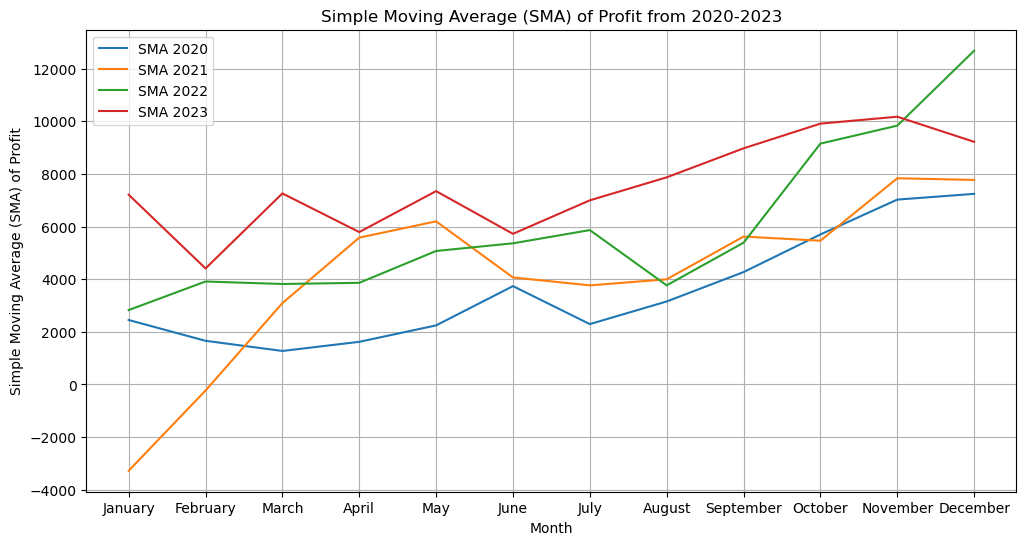

In [70]:
monthly_profit_over_time = df_copy.groupby(['Month','Year'])['Profit'].sum().reset_index()
monthly_profit_over_time['Month'] = monthly_profit_over_time['Month'].apply(lambda x: calendar.month_name[x])
monthly_profit_over_time.reset_index(drop=True, inplace=True)

# Create a list of years to loop through
years_to_plot = [2020, 2021, 2022, 2023]

# Plot time series for each year with SMA
plt.figure(figsize=(12, 6))
for year in years_to_plot:
    monthly_profit_for_year = monthly_profit_over_time[monthly_profit_over_time['Year'] == year]
    monthly_profit_for_year['SMA'] = monthly_profit_for_year['Profit'].rolling(window=3, min_periods=1).mean()
    sns.lineplot(data=monthly_profit_for_year, x='Month', y='SMA', marker='', label=f'SMA {year}')

plt.title('Simple Moving Average (SMA) of Profit from 2020-2023')
plt.xlabel('Month')
plt.ylabel('Simple Moving Average (SMA) of Profit')
plt.legend()
plt.grid(True)
plt.show()

Simple moving average adalah salah satu cara untuk melihat pattern yang jelas untuk time-series graphs.
Kita membuat simple moving average untuk 2 variabel paling penting untuk setiap perusahaan, yaitu sales dan profit.

Dari sini kita bisa menunjukkan bahwa pattern untuk sales dan profit memang mengalami kenaikan di setiap tahunnya, tetapi kita bisa lihat bahwa rata-rata profit 2023 tidak setinggi di tahun 2022, meskipun average sales paling tinggi adalah di tahun 2023. Ini adalah kemungkinan dikarenakan oleh banyak faktor seperti economic uncertainty yang membuat inflation naik, tax rate yang tinggi juga bisa membuat profit turun, atau bisa juga kemungkinan harga produk naik di tahun 2023, sehingga profit margin tidak tinggi.

# Analysis Summary

Untuk summary dari analisa yang dibuat, banyak faktor bisa mempengaruhi penjualan dan profit.

Segment Analysis - SMB merupakan salah satu segment terbesar sedunia, maka SMB merangkup mayoritas dari customer yang membeli software AWS. Meskipun Segment sendiri tidak ada efek yang signifikan terhadap penjualan maupun profit, industry perusahaan ada berkontribusi dengan penjualan dan juga profit. Industry yang paling membutuhkan software AWS adalah Finance, dan di follow oleh Energy, dan Manufacturing.

Product Analysis - Produk juga mempengaruhi penjualan dan profit, karena produk-produk ini punya cost tersendiri, dan juga demand-demand tersendiri. Meskipun ContactMatcher adalah produk yang paling banyak penjualannya, namun dia bukanlah main profit contributor terhadap AWS SaaS Sales.

Regional Analysis - Region mempengaruhi penjualan dan profit, karena perbedaan demand di negara-negara maju dan negara-negara yang masih berkembang. Negara-negara maju yang tingkat digitalisasi tinggi akan membutuhkan banyak software-software tertentu.

Time Series Analysis - Dari analisa time series yang dilakukan, penjualan akan diprediksikan untuk makin naik, tetapi kita harus waspada dengan cash flow untuk bisa meraup profit yang tinggi di tahun 2024.

# Conclusion and Suggestions

Dari analisa-analisa yang telah dibuat di atas, kita bisa melihat bahwa banyak faktor yang mempengaruhi penjualan dan profit, seperti industry, produk, dan region.
Untuk rekomendasi, produk-produk bisa difokus untuk dijual di sektor-sektor seperti Finance, Energy, dan Manufacturing, dan juga development of new software buat sektor industry tersebut. Untuk fokus, company bisa melakukan ekspansi ke negara-negara berkembang juga untuk increase market share. Product-product yang dijual pun bisa difokuskan ke site analytics dan product analytics, karena low cost dan high profit.

Company juga harus hati-hati untuk kasih discount yang terlalu besar, untuk prevent loss in sales seperti terjadinya di Oceania dan Jepang.
Market penetration strategy juga dibutuhkan kalau mau sukses di Jepang, atau adanya UI/UX development yang bisa cater ke orang-orang di East Asia.